# Datos anteriores

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

# Definiendo visualizaciones

## Preguntas
Después de la etapa de exploración de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. Así, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### Ventas
1. ¿Cuáles fueron los métodos de pago más utilizados en 2023?
2. ¿Cuál fue la facturación por categoría en 2023?
3. ¿Cómo fueron las ventas a lo largo de los meses en 2023?
4. ¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?

### Perfil del cliente
5. ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?
6. ¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?
7. ¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?

## Prompts

### Pregunta 1: ¿Cuáles fueron los métodos de pago más utilizados en el 2023?
**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cuáles métodos de pago fueron los más utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuación, deseamos crear una visualización que muestre la cantidad de esos métodos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

**Respuesta**

Perfecto. A continuación te muestro cómo:

1. Crear una **tabla resumen** llamada `metodos_de_pago` con el recuento de cada método de pago.
2. Construir una **visualización de barras** usando `matplotlib` y `seaborn` para mostrar la cantidad de veces que se utilizó cada uno.

Aquí tienes el código completo:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# 2. Visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

plt.title('Cantidad de Compras por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

### 🔍 Explicación:

* `value_counts()` cuenta la frecuencia de cada método de pago.
* `seaborn.barplot()` se usa para graficar los resultados con estilo limpio.
* El gráfico te ayudará a identificar de forma clara cuál método es más popular entre los clientes.

¿Quieres una versión alternativa en gráfico de torta (pie chart) o continuar con otro análisis?

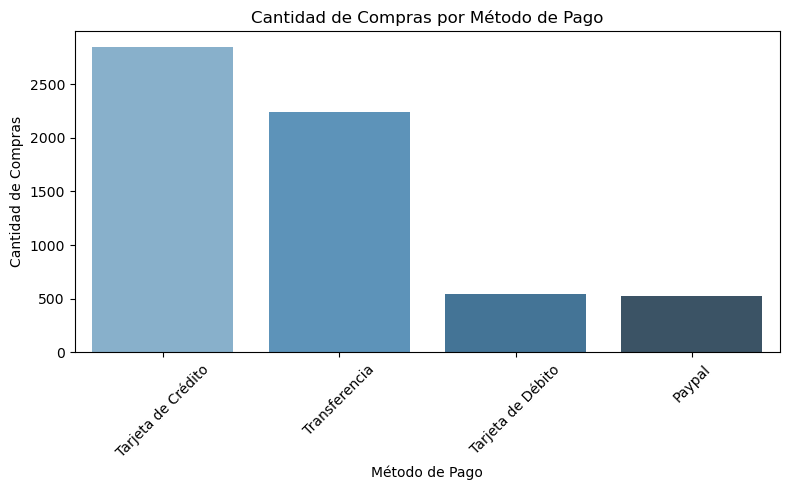

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", palette="Blues_d")

plt.title("Cantidad de Compras por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparando los datos

### Pregunta 2: ¿Cuál fue la facturación por categoría en 2023?
> 🚧 Importante: Para la facturación se considerará el producto entre el precio unitario y cantidad sumados al costo de envío de cada producto.

**Prompt**
Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras horizontales que muestre la facturación por categoría de Zoop.

En "df", tenemos las siguientes columnas:

* categoria: categorías de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de envío total de la compra.
* Deseamos crear una visualización que muestre la facturación de cada categoría, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el costo de envío.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

**Respuesta**
Perfecto. Para construir el gráfico de **barras horizontales** con la facturación por categoría, primero necesitas:

1. Calcular la facturación total por compra: `precio_unitario * cantidad + envio`.
2. Agrupar los datos por `categoria`.
3. Sumar la facturación por cada categoría.
4. Visualizar con `matplotlib` o `seaborn`.

Aquí tienes el código completo en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear una columna de facturación total por compra
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().sort_values()

# 3. Visualización en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette='viridis')

plt.title('Facturación por Categoría de Producto')
plt.xlabel('Facturación Total')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()
```

### 🔍 Resultado:

Este gráfico de barras horizontales muestra claramente qué **categorías de productos** generan mayor (o menor) facturación, considerando tanto el valor de los productos como el costo del envío.

¿Quieres también mostrar el **porcentaje de facturación por categoría** o ver cómo varía mensualmente por categoría?


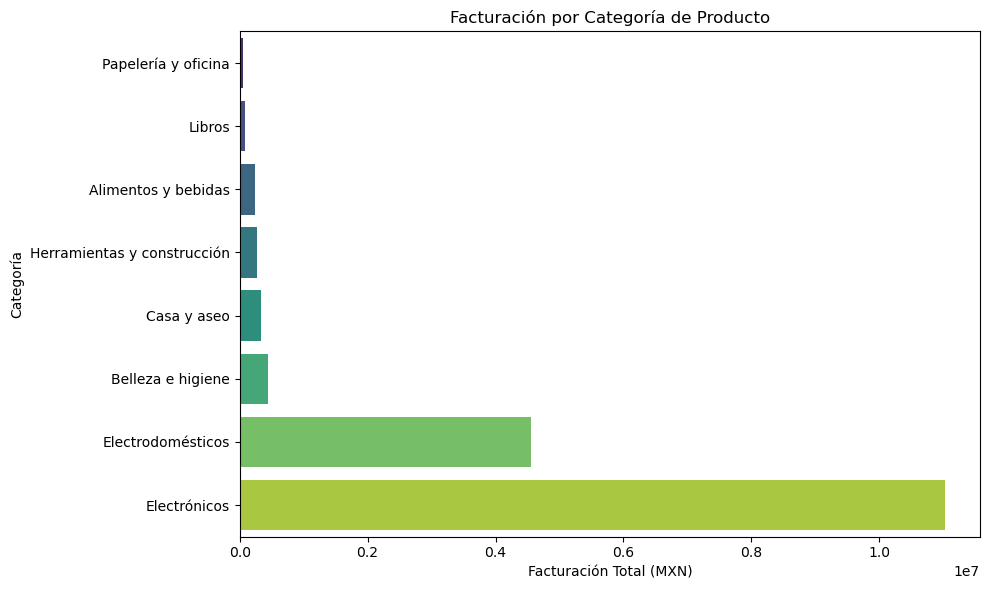

In [5]:
# 1. Crear una columna de facturación total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# 3. Visualización en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    x=facturacion_categoria.values, y=facturacion_categoria.index, palette="viridis"
)

plt.title("Facturación por Categoría de Producto")
plt.xlabel("Facturación Total (MXN)")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

### Pregunta 3: ¿Cómo fueron las ventas a lo largo de los meses en el 2023?

**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de líneas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:

fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)
facturación: calculada como el producto del precio unitario y la cantidad, sumado al costo de envío de cada venta.
Deseamos crear una visualización que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del índice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gráfico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

**Respuesta**

Perfecto. Vamos a construir un **gráfico de líneas** que muestre la **facturación total por mes**, utilizando la columna `fecha` para agrupar y luego renombrar los meses con el diccionario de traducción.

Aquí está el código completo:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear columna con el mes como texto completo
df['mes_nombre'] = df['fecha'].dt.strftime('%B')  # e.g., 'January', 'February', etc.

# Crear columna con el número del mes para ordenar correctamente
df['mes_numero'] = df['fecha'].dt.month

# Calcular la facturación mensual
ventas_mensuales = df.groupby(['mes_numero', 'mes_nombre'])['facturacion'].sum().reset_index()

# Ordenar por número de mes
ventas_mensuales = ventas_mensuales.sort_values('mes_numero')

# Diccionario de traducción de meses
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar', 'April': 'Abr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}

# Aplicar traducción
ventas_mensuales['mes'] = ventas_mensuales['mes_nombre'].map(meses)

# Visualización
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2)

plt.title('Facturación Total Mensual - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturación')
plt.grid(True)
plt.tight_layout()
plt.show()
```

### ✅ Resultado:

* El gráfico de líneas muestra cómo evoluciona la **facturación mensual**.
* Se utilizan los nombres de los meses **traducidos al español** para el eje X.
* El gráfico se ordena correctamente gracias al uso del número de mes.

¿Te gustaría agregar etiquetas de valores sobre cada punto o comparar con el año anterior si hubiera datos históricos?


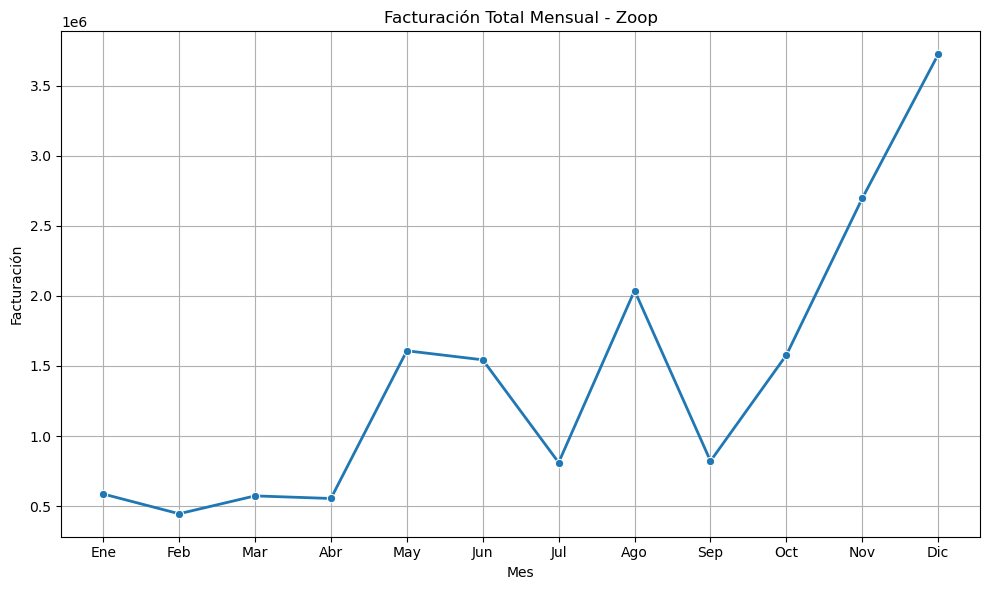

In [6]:
# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el número del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturación mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por número de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducción
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# Visualización
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x="mes", y="facturacion", marker="o", linewidth=2)

plt.title("Facturación Total Mensual - Zoop")
plt.xlabel("Mes")
plt.ylabel("Facturación")
plt.grid(True)
plt.tight_layout()
plt.show()

# Composición de datos dinámicos

La composición es una categoría importante de gráficos que permiten la comprensión de los datos.
Los datos dinámicos son datos no estáticos, es decir que van cambiando en el tiempo.

Para este análisis se añadirán 3 variables en simultáneo, siendo una de estas categórica.

### Pregunta 4: ¿Cómo está dividida la venta por trimestre por método de pago? ¿Existe algún período en el que algún tipo de pago se destaque?

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras apiladas que muestre las ventas por trimestre en relación con el método de pago de Zoop.

En "df", tenemos las siguientes columnas:

- fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)
- facturacion: con los valores de las ventas
metodo_pago: con el método de pago elegido en la compra
- Deseamos crear una visualización que muestre las ventas por trimestre, agrupando los métodos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

#### Respuesta

Excelente, para construir un **gráfico de barras apiladas** con la **facturación por trimestre separada por método de pago**, realizaremos los siguientes pasos:

##### ✅ Pasos:

1. Asegurarnos de que la columna `fecha` es tipo `datetime`.
2. Crear una columna `trimestre` a partir de la fecha.
3. Agrupar los datos por `trimestre` y `metodo_pago`, sumando la `facturacion`.
4. Reorganizar los datos en formato de tabla cruzada (pivot table) para graficar.
5. Crear un gráfico de **barras apiladas** con `matplotlib`.

##### 🧠 Código en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt

# 1. Asegurar que 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str).str.replace('2023Q', 'T')

# 3. Agrupar por trimestre y método de pago, sumando facturación
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# 4. Crear gráfico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

plt.title('Facturación por Trimestre y Método de Pago - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturación')
plt.legend(title='Método de Pago')
plt.tight_layout()
plt.show()
```

##### 📊 Resultado:

* Cada barra representa un **trimestre (T1, T2, T3, T4)**.
* Cada segmento de color en la barra representa un **método de pago**.
* El gráfico muestra la **composición de facturación por método** en cada trimestre.

¿Te gustaría complementar con proporciones (%), agregar totales por encima de cada barra o realizarlo con `seaborn`?


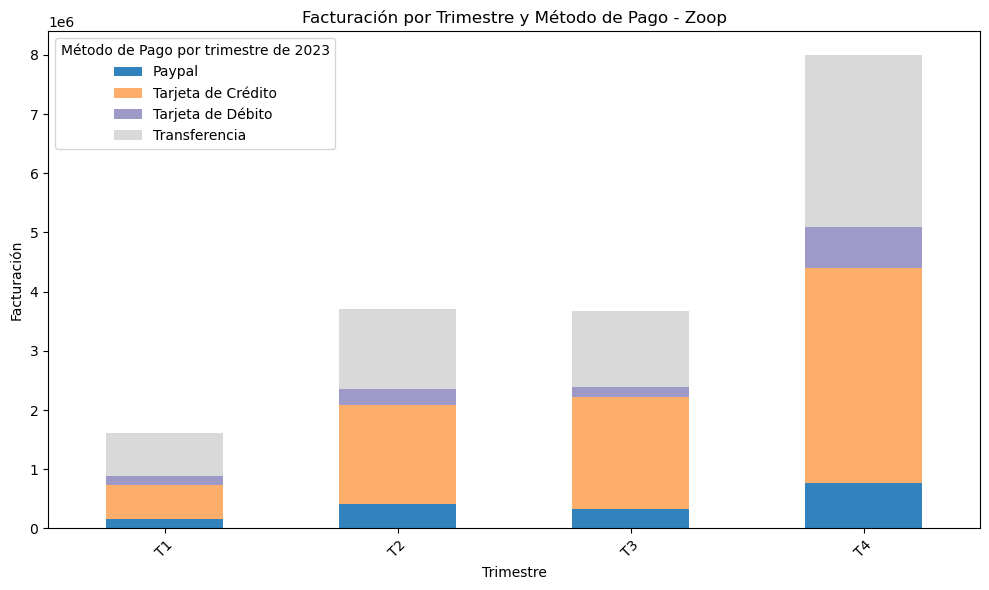

In [9]:
# 1. Asegurar que 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y método de pago, sumando facturación
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# 4. Crear gráfico de barras apiladas
ventas_trimestre.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")

plt.title("Facturación por Trimestre y Método de Pago - Zoop")
plt.xlabel("Trimestre")
plt.ylabel("Facturación")
plt.legend(title="Método de Pago por trimestre de 2023")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Graficando con columnas agrupadas

La directiva de Zoop está preocupada por las categorías con menor facturación anual en su e-commerce y, por eso, le gustaría entender el desempeño de esas categorías de manera aislada. Para esto, recibimos la demanda de explorar la facturación trimestral investigando cómo está el equilibrio de estas ventas por cada categoría.

Para resolver este problema, vamos a agrupar las 3 categorías con las menores facturaciones anuales, separándolas por trimestre mediante un gráfico de columnas agrupadas.

¿Por qué un gráfico de columnas agrupadas?

Un gráfico de columnas agrupadas es ideal para comparar categorías diferentes en relación con una variable (puede ser temporal o no), mostrando cómo los valores se comparan dentro de cada categoría en columnas separadas, facilitando la visualización de patrones y diferencias entre grupos.

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir una visualización de un gráfico de columnas agrupadas lado a lado que presente las ventas por trimestre en relación con las categorías de los productos.

En "df", tenemos las columnas:

- trimestre: con las fechas en trimestres de las compras
- faturamento: con los valores de las ventas
- categoria: con las categorías de los productos vendidos. Vamos a utilizar solo las categorías "Papelería y oficina", "Libros" y "Alimentos y bebidas".
Deseamos crear una visualización que presente las ventas por trimestre ("facturacion"), agrupando las categorías lado a lado en relación con el trimestre correspondiente a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.
#### Respuesta

Perfecto, vamos a crear un **gráfico de columnas agrupadas lado a lado** para mostrar las **ventas por trimestre**, comparando tres categorías específicas: **"Papelería y oficina"**, **"Libros"** y **"Alimentos y bebidas"**.

### ✅ Pasos:

1. Filtrar el DataFrame para quedarnos solo con las 3 categorías deseadas.
2. Agrupar por `trimestre` y `categoria`, sumando la `facturacion`.
3. Transformar los datos en formato de tabla cruzada (pivot table).
4. Crear el gráfico de columnas agrupadas con `matplotlib`.

---

### 🧠 Código en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las 3 categorías deseadas
categorias_interes = ['Papelería y oficina', 'Libros', 'Alimentos y bebidas']
df_filtrado = df[df['categoria'].isin(categorias_interes)]

# Agrupar por trimestre y categoría, sumando la facturación
ventas_categoria = df_filtrado.groupby(['trimestre', 'categoria'])['facturacion'].sum().unstack(fill_value=0)

# Crear gráfico de columnas agrupadas
ventas_categoria.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# Título y etiquetas
plt.title('Facturación por Trimestre y Categoría - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturación')
plt.xticks(rotation=0)
plt.legend(title='Categoría')

plt.tight_layout()
plt.show()
```

---

### 📊 Resultado:

* Cada **grupo de barras** representa un **trimestre** (`T1`, `T2`, etc.).
* Dentro de cada grupo, hay **tres barras**, una por categoría.
* Muestra claramente cómo se comportó la facturación de cada categoría en cada trimestre.

¿Quieres que te muestre la versión con porcentajes, etiquetas de valor sobre cada barra o exportar el gráfico como imagen?

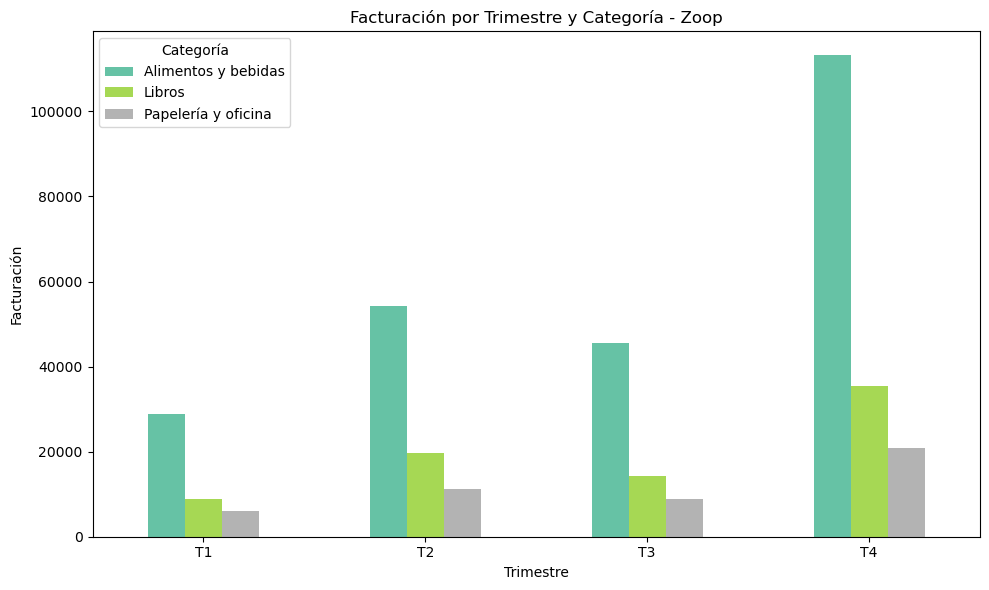

In [10]:
# Filtrar solo las 3 categorías deseadas
categorias_interes = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categoría, sumando la facturación
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

# Crear gráfico de columnas agrupadas
ventas_categoria.plot(kind="bar", figsize=(10, 6), colormap="Set2")

# Título y etiquetas
plt.title("Facturación por Trimestre y Categoría - Zoop")
plt.xlabel("Trimestre")
plt.ylabel("Facturación")
plt.xticks(rotation=0)
plt.legend(title="Categoría")

plt.tight_layout()
plt.show()